## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  61.885728   339.795101  0.580300   6.577087  1.274331
1  45.776138   262.255082  0.612069   4.443122  1.306073
2  94.798006  1371.723758  0.456690  10.547258  1.356739
3  30.830859  1687.056833  0.106011   9.175558  1.440312
4  29.347002  1218.242062  0.794505   4.917131  1.419988


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.22369 | train_mse: 2.3225  | train_mae: 1.15555 |  0:00:00s
epoch 1  | loss: 0.90072 | train_mse: 1.78518 | train_mae: 1.04599 |  0:00:00s


epoch 2  | loss: 0.77221 | train_mse: 1.92071 | train_mae: 1.01621 |  0:00:00s
epoch 3  | loss: 0.7228  | train_mse: 2.13636 | train_mae: 1.01377 |  0:00:00s


epoch 4  | loss: 0.67479 | train_mse: 1.35773 | train_mae: 0.89499 |  0:00:00s
epoch 5  | loss: 0.69735 | train_mse: 1.86304 | train_mae: 1.05433 |  0:00:01s


epoch 6  | loss: 0.73541 | train_mse: 1.6617  | train_mae: 1.02792 |  0:00:01s


epoch 7  | loss: 0.50156 | train_mse: 1.27597 | train_mae: 0.89233 |  0:00:01s
epoch 8  | loss: 0.43352 | train_mse: 0.96303 | train_mae: 0.74725 |  0:00:01s


epoch 9  | loss: 0.54272 | train_mse: 0.70255 | train_mae: 0.63118 |  0:00:01s
epoch 10 | loss: 0.50841 | train_mse: 0.80216 | train_mae: 0.62923 |  0:00:01s


epoch 11 | loss: 0.46123 | train_mse: 0.85885 | train_mae: 0.66813 |  0:00:02s
epoch 12 | loss: 0.51961 | train_mse: 0.77635 | train_mae: 0.62772 |  0:00:02s


epoch 13 | loss: 0.42495 | train_mse: 0.61768 | train_mae: 0.57241 |  0:00:02s
epoch 14 | loss: 0.46796 | train_mse: 0.59736 | train_mae: 0.56035 |  0:00:02s


epoch 15 | loss: 0.35905 | train_mse: 0.54512 | train_mae: 0.52551 |  0:00:02s
epoch 16 | loss: 0.43755 | train_mse: 0.47263 | train_mae: 0.49926 |  0:00:02s


epoch 17 | loss: 0.43508 | train_mse: 0.4363  | train_mae: 0.49705 |  0:00:02s


epoch 18 | loss: 0.35832 | train_mse: 0.50174 | train_mae: 0.54085 |  0:00:03s
epoch 19 | loss: 0.27469 | train_mse: 0.48508 | train_mae: 0.54031 |  0:00:03s


epoch 20 | loss: 0.40697 | train_mse: 0.49218 | train_mae: 0.52777 |  0:00:03s
epoch 21 | loss: 0.30243 | train_mse: 0.40086 | train_mae: 0.47864 |  0:00:03s


epoch 22 | loss: 0.57108 | train_mse: 0.39778 | train_mae: 0.48431 |  0:00:03s
epoch 23 | loss: 0.27004 | train_mse: 0.37784 | train_mae: 0.46981 |  0:00:03s


epoch 24 | loss: 0.39914 | train_mse: 0.34398 | train_mae: 0.42871 |  0:00:04s
epoch 25 | loss: 0.29995 | train_mse: 0.31184 | train_mae: 0.41312 |  0:00:04s


epoch 26 | loss: 0.28302 | train_mse: 0.28628 | train_mae: 0.40685 |  0:00:04s
epoch 27 | loss: 0.25451 | train_mse: 0.25396 | train_mae: 0.382   |  0:00:04s


epoch 28 | loss: 0.28095 | train_mse: 0.25064 | train_mae: 0.37729 |  0:00:04s
epoch 29 | loss: 0.47725 | train_mse: 0.31923 | train_mae: 0.42691 |  0:00:04s


epoch 30 | loss: 0.31498 | train_mse: 0.4049  | train_mae: 0.47951 |  0:00:04s
epoch 31 | loss: 0.32596 | train_mse: 0.46191 | train_mae: 0.49854 |  0:00:04s


epoch 32 | loss: 0.21983 | train_mse: 0.43438 | train_mae: 0.47618 |  0:00:05s
epoch 33 | loss: 0.52012 | train_mse: 0.34504 | train_mae: 0.43111 |  0:00:05s


epoch 34 | loss: 0.2912  | train_mse: 0.25221 | train_mae: 0.39069 |  0:00:05s
epoch 35 | loss: 0.19965 | train_mse: 0.25299 | train_mae: 0.38546 |  0:00:05s


epoch 36 | loss: 0.23629 | train_mse: 0.27046 | train_mae: 0.38142 |  0:00:05s


epoch 37 | loss: 0.19374 | train_mse: 0.29307 | train_mae: 0.38478 |  0:00:05s
epoch 38 | loss: 0.30569 | train_mse: 0.24925 | train_mae: 0.37555 |  0:00:05s


epoch 39 | loss: 0.39233 | train_mse: 0.23477 | train_mae: 0.36735 |  0:00:06s
epoch 40 | loss: 0.25711 | train_mse: 0.21756 | train_mae: 0.34408 |  0:00:06s


epoch 41 | loss: 0.22931 | train_mse: 0.22092 | train_mae: 0.3412  |  0:00:06s
epoch 42 | loss: 0.20063 | train_mse: 0.21373 | train_mae: 0.34363 |  0:00:06s


epoch 43 | loss: 0.31625 | train_mse: 0.21914 | train_mae: 0.36847 |  0:00:06s
epoch 44 | loss: 0.27238 | train_mse: 0.24052 | train_mae: 0.39139 |  0:00:06s


epoch 45 | loss: 0.30605 | train_mse: 0.32803 | train_mae: 0.42391 |  0:00:06s
epoch 46 | loss: 0.25125 | train_mse: 0.3853  | train_mae: 0.40869 |  0:00:06s


epoch 47 | loss: 0.31811 | train_mse: 0.32963 | train_mae: 0.38042 |  0:00:07s
epoch 48 | loss: 0.26232 | train_mse: 0.3415  | train_mae: 0.39396 |  0:00:07s


epoch 49 | loss: 0.34215 | train_mse: 0.31712 | train_mae: 0.38672 |  0:00:07s
epoch 50 | loss: 0.25651 | train_mse: 0.32918 | train_mae: 0.40466 |  0:00:07s


epoch 51 | loss: 0.29765 | train_mse: 0.31441 | train_mae: 0.3979  |  0:00:07s
epoch 52 | loss: 0.29652 | train_mse: 0.25745 | train_mae: 0.35853 |  0:00:07s


epoch 53 | loss: 0.28569 | train_mse: 0.23852 | train_mae: 0.34547 |  0:00:07s
epoch 54 | loss: 0.24809 | train_mse: 0.21563 | train_mae: 0.33493 |  0:00:07s


epoch 55 | loss: 0.3286  | train_mse: 0.23637 | train_mae: 0.36412 |  0:00:08s
epoch 56 | loss: 0.23977 | train_mse: 0.26006 | train_mae: 0.38273 |  0:00:08s


epoch 57 | loss: 0.31207 | train_mse: 0.25709 | train_mae: 0.3792  |  0:00:08s


epoch 58 | loss: 0.34549 | train_mse: 0.23037 | train_mae: 0.34542 |  0:00:08s
epoch 59 | loss: 0.31857 | train_mse: 0.21629 | train_mae: 0.33996 |  0:00:08s


epoch 60 | loss: 0.35858 | train_mse: 0.20117 | train_mae: 0.32657 |  0:00:08s
epoch 61 | loss: 0.33957 | train_mse: 0.20098 | train_mae: 0.32906 |  0:00:08s


epoch 62 | loss: 0.26486 | train_mse: 0.21043 | train_mae: 0.33426 |  0:00:09s
epoch 63 | loss: 0.273   | train_mse: 0.20807 | train_mae: 0.31709 |  0:00:09s


epoch 64 | loss: 0.22598 | train_mse: 0.21546 | train_mae: 0.3438  |  0:00:09s
epoch 65 | loss: 0.25971 | train_mse: 0.18752 | train_mae: 0.33029 |  0:00:09s


epoch 66 | loss: 0.27526 | train_mse: 0.17013 | train_mae: 0.30026 |  0:00:09s
epoch 67 | loss: 0.20241 | train_mse: 0.16227 | train_mae: 0.26921 |  0:00:09s


epoch 68 | loss: 0.23825 | train_mse: 0.17312 | train_mae: 0.27024 |  0:00:09s
epoch 69 | loss: 0.30158 | train_mse: 0.16239 | train_mae: 0.26838 |  0:00:10s


epoch 70 | loss: 0.31432 | train_mse: 0.28205 | train_mae: 0.35877 |  0:00:10s
epoch 71 | loss: 0.3685  | train_mse: 0.25438 | train_mae: 0.33324 |  0:00:10s


epoch 72 | loss: 0.47832 | train_mse: 0.1963  | train_mae: 0.29407 |  0:00:10s
epoch 73 | loss: 0.32699 | train_mse: 0.17877 | train_mae: 0.2803  |  0:00:10s


epoch 74 | loss: 0.30032 | train_mse: 0.19171 | train_mae: 0.30959 |  0:00:10s
epoch 75 | loss: 0.28648 | train_mse: 0.24805 | train_mae: 0.34029 |  0:00:10s


epoch 76 | loss: 0.36646 | train_mse: 0.31719 | train_mae: 0.38246 |  0:00:11s
epoch 77 | loss: 0.39548 | train_mse: 0.25091 | train_mae: 0.35097 |  0:00:11s


epoch 78 | loss: 0.30665 | train_mse: 0.16964 | train_mae: 0.30478 |  0:00:11s
epoch 79 | loss: 0.20081 | train_mse: 0.19483 | train_mae: 0.31901 |  0:00:11s


epoch 80 | loss: 0.30016 | train_mse: 0.27597 | train_mae: 0.34855 |  0:00:11s
epoch 81 | loss: 0.28632 | train_mse: 0.26042 | train_mae: 0.33942 |  0:00:11s


epoch 82 | loss: 0.24064 | train_mse: 0.22628 | train_mae: 0.31955 |  0:00:11s
epoch 83 | loss: 0.25849 | train_mse: 0.20098 | train_mae: 0.30933 |  0:00:11s


epoch 84 | loss: 0.21827 | train_mse: 0.1933  | train_mae: 0.31055 |  0:00:12s
epoch 85 | loss: 0.21921 | train_mse: 0.22955 | train_mae: 0.33227 |  0:00:12s


epoch 86 | loss: 0.30209 | train_mse: 0.18162 | train_mae: 0.30339 |  0:00:12s
epoch 87 | loss: 0.19213 | train_mse: 0.13586 | train_mae: 0.26435 |  0:00:12s


epoch 88 | loss: 0.28233 | train_mse: 0.13439 | train_mae: 0.25483 |  0:00:12s
epoch 89 | loss: 0.25796 | train_mse: 0.18874 | train_mae: 0.3037  |  0:00:12s


epoch 90 | loss: 0.19943 | train_mse: 0.20086 | train_mae: 0.31594 |  0:00:12s
epoch 91 | loss: 0.23126 | train_mse: 0.17945 | train_mae: 0.30071 |  0:00:12s


epoch 92 | loss: 0.31601 | train_mse: 0.25001 | train_mae: 0.32587 |  0:00:13s
epoch 93 | loss: 0.17201 | train_mse: 0.24048 | train_mae: 0.31904 |  0:00:13s


epoch 94 | loss: 0.18376 | train_mse: 0.2513  | train_mae: 0.33447 |  0:00:13s
epoch 95 | loss: 0.15279 | train_mse: 0.36221 | train_mae: 0.39215 |  0:00:13s


epoch 96 | loss: 0.36177 | train_mse: 0.2209  | train_mae: 0.31422 |  0:00:13s
epoch 97 | loss: 0.23058 | train_mse: 0.26654 | train_mae: 0.33849 |  0:00:13s


epoch 98 | loss: 0.33809 | train_mse: 0.34212 | train_mae: 0.35904 |  0:00:13s
epoch 99 | loss: 0.45457 | train_mse: 0.29109 | train_mae: 0.3337  |  0:00:13s
epoch 100| loss: 0.24503 | train_mse: 0.1681  | train_mae: 0.27793 |  0:00:13s


epoch 101| loss: 0.1249  | train_mse: 0.14052 | train_mae: 0.27389 |  0:00:14s
epoch 102| loss: 0.34881 | train_mse: 0.20429 | train_mae: 0.31484 |  0:00:14s


epoch 103| loss: 0.32999 | train_mse: 0.15169 | train_mae: 0.27472 |  0:00:14s
epoch 104| loss: 0.15286 | train_mse: 0.14318 | train_mae: 0.26052 |  0:00:14s
epoch 105| loss: 0.14859 | train_mse: 0.14943 | train_mae: 0.27588 |  0:00:14s


epoch 106| loss: 0.20182 | train_mse: 0.15119 | train_mae: 0.28105 |  0:00:14s
epoch 107| loss: 0.15521 | train_mse: 0.17256 | train_mae: 0.29152 |  0:00:14s
epoch 108| loss: 0.19298 | train_mse: 0.15977 | train_mae: 0.28081 |  0:00:14s


epoch 109| loss: 0.14878 | train_mse: 0.15408 | train_mae: 0.2732  |  0:00:14s


epoch 110| loss: 0.17821 | train_mse: 0.13803 | train_mae: 0.26262 |  0:00:15s
epoch 111| loss: 0.31768 | train_mse: 0.13883 | train_mae: 0.27054 |  0:00:15s


epoch 112| loss: 0.20541 | train_mse: 0.13936 | train_mae: 0.26899 |  0:00:15s
epoch 113| loss: 0.28172 | train_mse: 0.13819 | train_mae: 0.24839 |  0:00:15s


epoch 114| loss: 0.21351 | train_mse: 0.13735 | train_mae: 0.24875 |  0:00:15s
epoch 115| loss: 0.19473 | train_mse: 0.15273 | train_mae: 0.26151 |  0:00:15s


epoch 116| loss: 0.20064 | train_mse: 0.14896 | train_mae: 0.25998 |  0:00:15s
epoch 117| loss: 0.29655 | train_mse: 0.1264  | train_mae: 0.24117 |  0:00:15s


epoch 118| loss: 0.14994 | train_mse: 0.13111 | train_mae: 0.23794 |  0:00:16s
epoch 119| loss: 0.26787 | train_mse: 0.12919 | train_mae: 0.23755 |  0:00:16s


epoch 120| loss: 0.13818 | train_mse: 0.12528 | train_mae: 0.23635 |  0:00:16s
epoch 121| loss: 0.14131 | train_mse: 0.09995 | train_mae: 0.2229  |  0:00:16s


epoch 122| loss: 0.21164 | train_mse: 0.10624 | train_mae: 0.23812 |  0:00:16s
epoch 123| loss: 0.21758 | train_mse: 0.09809 | train_mae: 0.22405 |  0:00:16s


epoch 124| loss: 0.34753 | train_mse: 0.17647 | train_mae: 0.26786 |  0:00:16s
epoch 125| loss: 0.11881 | train_mse: 0.16476 | train_mae: 0.26047 |  0:00:16s


epoch 126| loss: 0.14182 | train_mse: 0.16207 | train_mae: 0.26401 |  0:00:17s
epoch 127| loss: 0.17166 | train_mse: 0.16706 | train_mae: 0.26696 |  0:00:17s


epoch 128| loss: 0.17019 | train_mse: 0.12588 | train_mae: 0.23158 |  0:00:17s
epoch 129| loss: 0.13584 | train_mse: 0.11337 | train_mae: 0.22722 |  0:00:17s


epoch 130| loss: 0.10215 | train_mse: 0.15657 | train_mae: 0.25774 |  0:00:17s


epoch 131| loss: 0.13663 | train_mse: 0.2438  | train_mae: 0.28848 |  0:00:18s
epoch 132| loss: 0.20752 | train_mse: 0.25877 | train_mae: 0.29586 |  0:00:18s


epoch 133| loss: 0.13498 | train_mse: 0.20853 | train_mae: 0.28213 |  0:00:18s
epoch 134| loss: 0.1081  | train_mse: 0.11507 | train_mae: 0.23138 |  0:00:18s


epoch 135| loss: 0.29428 | train_mse: 0.10811 | train_mae: 0.23927 |  0:00:18s
epoch 136| loss: 0.22322 | train_mse: 0.10309 | train_mae: 0.22891 |  0:00:18s


epoch 137| loss: 0.23094 | train_mse: 0.0893  | train_mae: 0.21883 |  0:00:18s
epoch 138| loss: 0.24563 | train_mse: 0.11486 | train_mae: 0.24226 |  0:00:18s


epoch 139| loss: 0.24863 | train_mse: 0.19184 | train_mae: 0.27865 |  0:00:19s
epoch 140| loss: 0.45645 | train_mse: 0.2223  | train_mae: 0.28639 |  0:00:19s
epoch 141| loss: 0.26063 | train_mse: 0.17457 | train_mae: 0.27065 |  0:00:19s


epoch 142| loss: 0.14449 | train_mse: 0.14561 | train_mae: 0.26704 |  0:00:19s
epoch 143| loss: 0.12241 | train_mse: 0.14941 | train_mae: 0.28    |  0:00:19s


epoch 144| loss: 0.1893  | train_mse: 0.20607 | train_mae: 0.3129  |  0:00:19s


epoch 145| loss: 0.22945 | train_mse: 0.16493 | train_mae: 0.27582 |  0:00:20s
epoch 146| loss: 0.16887 | train_mse: 0.09484 | train_mae: 0.2319  |  0:00:20s


epoch 147| loss: 0.1751  | train_mse: 0.07046 | train_mae: 0.20396 |  0:00:20s
epoch 148| loss: 0.09982 | train_mse: 0.07834 | train_mae: 0.19635 |  0:00:20s
epoch 149| loss: 0.09368 | train_mse: 0.09075 | train_mae: 0.21337 |  0:00:20s


epoch 150| loss: 0.10465 | train_mse: 0.12272 | train_mae: 0.23638 |  0:00:20s
epoch 151| loss: 0.19434 | train_mse: 0.18311 | train_mae: 0.26319 |  0:00:20s
epoch 152| loss: 0.19855 | train_mse: 0.17491 | train_mae: 0.2612  |  0:00:20s


epoch 153| loss: 0.13524 | train_mse: 0.14571 | train_mae: 0.24381 |  0:00:20s
epoch 154| loss: 0.13338 | train_mse: 0.11223 | train_mae: 0.22693 |  0:00:20s
epoch 155| loss: 0.37107 | train_mse: 0.04636 | train_mae: 0.16565 |  0:00:20s


epoch 156| loss: 0.26282 | train_mse: 0.07311 | train_mae: 0.20226 |  0:00:21s
epoch 157| loss: 0.30694 | train_mse: 0.07729 | train_mae: 0.19555 |  0:00:21s
epoch 158| loss: 0.14804 | train_mse: 0.08334 | train_mae: 0.21581 |  0:00:21s


epoch 159| loss: 0.10448 | train_mse: 0.12445 | train_mae: 0.25551 |  0:00:21s
epoch 160| loss: 0.17719 | train_mse: 0.1252  | train_mae: 0.25764 |  0:00:21s


epoch 161| loss: 0.20624 | train_mse: 0.09922 | train_mae: 0.23182 |  0:00:21s
epoch 162| loss: 0.15943 | train_mse: 0.08708 | train_mae: 0.21237 |  0:00:21s
epoch 163| loss: 0.12158 | train_mse: 0.0746  | train_mae: 0.2043  |  0:00:21s


epoch 164| loss: 0.30195 | train_mse: 0.06343 | train_mae: 0.19568 |  0:00:21s
epoch 165| loss: 0.12661 | train_mse: 0.06139 | train_mae: 0.18923 |  0:00:21s
epoch 166| loss: 0.27627 | train_mse: 0.3202  | train_mae: 0.29512 |  0:00:21s


epoch 167| loss: 0.19315 | train_mse: 0.3672  | train_mae: 0.32184 |  0:00:22s
epoch 168| loss: 0.15819 | train_mse: 0.28281 | train_mae: 0.29684 |  0:00:22s
epoch 169| loss: 0.31001 | train_mse: 0.09047 | train_mae: 0.21698 |  0:00:22s


epoch 170| loss: 0.15    | train_mse: 0.06372 | train_mae: 0.19304 |  0:00:22s
epoch 171| loss: 0.16881 | train_mse: 0.08877 | train_mae: 0.21086 |  0:00:22s
epoch 172| loss: 0.13534 | train_mse: 0.1214  | train_mae: 0.24229 |  0:00:22s


epoch 173| loss: 0.18862 | train_mse: 0.12706 | train_mae: 0.25099 |  0:00:22s
epoch 174| loss: 0.1072  | train_mse: 0.11721 | train_mae: 0.24722 |  0:00:22s
epoch 175| loss: 0.19495 | train_mse: 0.10241 | train_mae: 0.23269 |  0:00:22s


epoch 176| loss: 0.15337 | train_mse: 0.08633 | train_mae: 0.219   |  0:00:22s
epoch 177| loss: 0.12521 | train_mse: 0.08316 | train_mae: 0.22809 |  0:00:22s
epoch 178| loss: 0.13468 | train_mse: 0.06982 | train_mae: 0.20426 |  0:00:23s


epoch 179| loss: 0.26161 | train_mse: 0.06483 | train_mae: 0.1969  |  0:00:23s
epoch 180| loss: 0.08761 | train_mse: 0.06482 | train_mae: 0.20064 |  0:00:23s
epoch 181| loss: 0.09557 | train_mse: 0.05361 | train_mae: 0.19122 |  0:00:23s


epoch 182| loss: 0.13185 | train_mse: 0.05008 | train_mae: 0.1846  |  0:00:23s
epoch 183| loss: 0.16866 | train_mse: 0.06709 | train_mae: 0.21235 |  0:00:23s
epoch 184| loss: 0.19198 | train_mse: 0.08154 | train_mae: 0.21084 |  0:00:23s


epoch 185| loss: 0.09215 | train_mse: 0.07471 | train_mae: 0.20183 |  0:00:23s
epoch 186| loss: 0.11283 | train_mse: 0.08823 | train_mae: 0.21507 |  0:00:23s


epoch 187| loss: 0.15119 | train_mse: 0.10922 | train_mae: 0.22689 |  0:00:23s
epoch 188| loss: 0.22291 | train_mse: 0.19959 | train_mae: 0.27461 |  0:00:23s
epoch 189| loss: 0.22442 | train_mse: 0.32786 | train_mae: 0.33592 |  0:00:24s


epoch 190| loss: 0.09219 | train_mse: 0.29307 | train_mae: 0.30937 |  0:00:24s
epoch 191| loss: 0.13491 | train_mse: 0.25789 | train_mae: 0.28724 |  0:00:24s
epoch 192| loss: 0.16063 | train_mse: 0.32609 | train_mae: 0.31749 |  0:00:24s


epoch 193| loss: 0.16016 | train_mse: 0.30493 | train_mae: 0.31007 |  0:00:24s
epoch 194| loss: 0.09613 | train_mse: 0.18577 | train_mae: 0.26674 |  0:00:24s
epoch 195| loss: 0.34832 | train_mse: 0.14283 | train_mae: 0.25059 |  0:00:24s


epoch 196| loss: 0.14286 | train_mse: 0.07676 | train_mae: 0.21419 |  0:00:24s
epoch 197| loss: 0.11276 | train_mse: 0.07956 | train_mae: 0.2138  |  0:00:24s
epoch 198| loss: 0.14837 | train_mse: 0.09248 | train_mae: 0.21901 |  0:00:24s


epoch 199| loss: 0.08956 | train_mse: 0.07231 | train_mae: 0.19503 |  0:00:24s
epoch 200| loss: 0.19796 | train_mse: 0.06323 | train_mae: 0.18375 |  0:00:24s


epoch 201| loss: 0.12996 | train_mse: 0.09175 | train_mae: 0.21951 |  0:00:25s
epoch 202| loss: 0.24493 | train_mse: 0.13795 | train_mae: 0.2476  |  0:00:25s
epoch 203| loss: 0.20599 | train_mse: 0.122   | train_mae: 0.23354 |  0:00:25s


epoch 204| loss: 0.14621 | train_mse: 0.13689 | train_mae: 0.23763 |  0:00:25s
epoch 205| loss: 0.25254 | train_mse: 0.13776 | train_mae: 0.23734 |  0:00:25s

Early stopping occurred at epoch 205 with best_epoch = 155 and best_train_mae = 0.16565
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

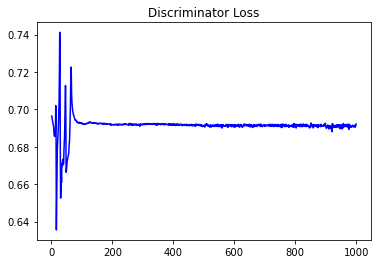

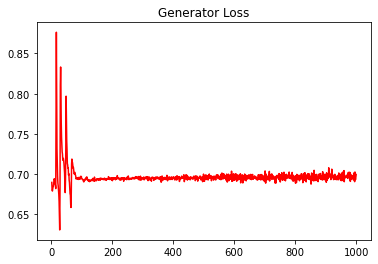

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3171426309901259


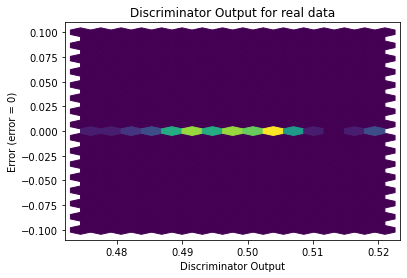

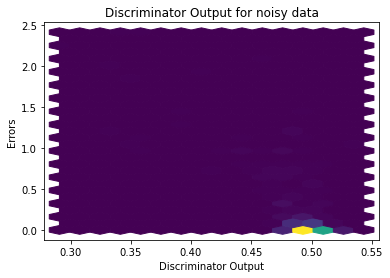

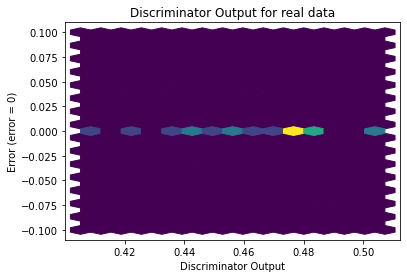

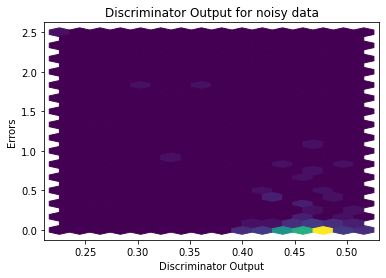

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


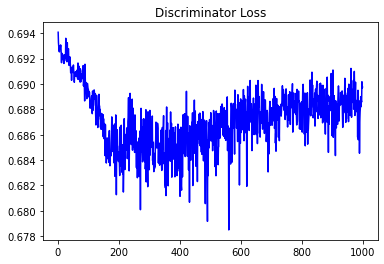

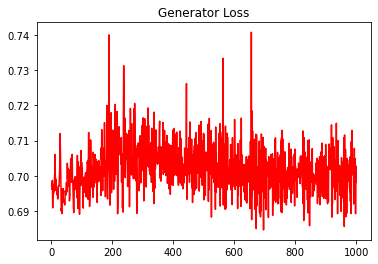

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2949345337904422


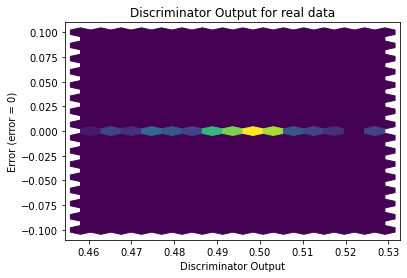

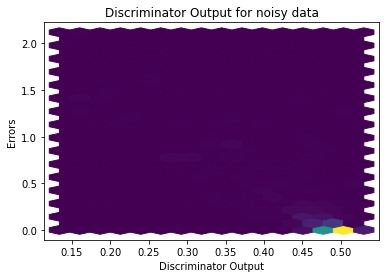

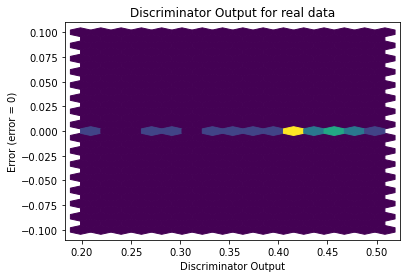

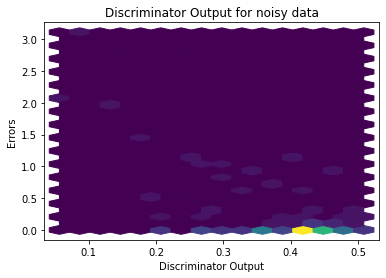

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3053]], requires_grad=True)
